# Converting DFA to NFA (easy!) and NFA to DFA (harder!).


In [1]:
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
import sys

# -- Detect if in Own Install or in Colab
try:
    import google.colab
    OWN_INSTALL = False
except:
    OWN_INSTALL = True
    
if OWN_INSTALL:
    
  #---- Leave these definitions ON if running on laptop
  #---- Else turn OFF by putting them between ''' ... '''

  sys.path[0:0] = ['../../../../..',  '../../../../../3rdparty',  
                   '../../../..',  '../../../../3rdparty',  
                   '../../..',     '../../../3rdparty', 
                   '../..',        '../../3rdparty',
                   '..',           '../3rdparty',
                   '../Jove',      '../Jove/jove']

else: # In colab
  ! if [ ! -d Jove ]; then git clone https://github.com/ganeshutah/Jove Jove; fi
  sys.path.append('./Jove')
  sys.path.append('./Jove/jove')

# -- common imports --
from jove.DotBashers import *
from jove.Def_md2mc  import *
from jove.Def_NFA    import *
from jove.Def_DFA    import *
from jove.AnimateNFA import *
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

You may use any of these help commands:
help(ResetStNum)
help(NxtStateStr)

You may use any of these help commands:
help(md2mc)
.. and if you want to dig more, then ..
help(default_line_attr)
help(length_ok_input_items)
help(union_line_attr_list_fld)
help(extend_rsltdict)
help(form_delta)
help(get_machine_components)

You may use any of these help commands:
help(mkp_dfa)
help(mk_dfa)
help(totalize_dfa)
help(addtosigma_delta)
help(step_dfa)
help(run_dfa)
help(accepts_dfa)
help(comp_dfa)
help(union_dfa)
help(intersect_dfa)
help(pruneUnreach)
help(iso_dfa)
help(langeq_dfa)
help(same_status)
help(h_langeq_dfa)
help(fixptDist)
help(min_dfa)
help(pairFR)
help(state_combos)
help(sepFinNonFin)
help(bash_eql_classes)
help(listminus)
help(bash_1)
help(mk_rep_eqc)
help(F_of)
help(rep_of_s)
help(q0_of)
help(Delta_of)
help(mk_state_eqc_name)

You may use any of these help commands:
help(mk_nfa)
help(totalize_nfa)
help(step_nfa)
help(run_nfa)
help(ec_step_nfa)
help(Eclosure)
help(Echelp)
help(accept

L(dfaD1) = { w | w has exactly two 0's}

In [2]:
dfaD1 = md2mc('''
  DFA
  I : 0 -> S1
  I : 1 -> I
  S1: 0 -> F
  S1: 1 -> S1
  F : 0 -> S2
  F : 1 -> F
  S2: 0|1 -> S2
''')

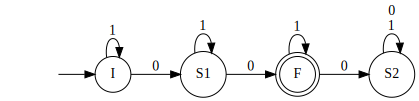

In [3]:
dotObj_dfa(dfaD1, FuseEdges=True)

L(dfaD2) = { w | w has at least two 1's}

In [4]:
dfaD2 = md2mc('''
  DFA
  I : 0 -> I
  I : 1 -> S1
  S1: 0 -> S1
  S1: 1 -> F
  F : 0|1 -> F
''')

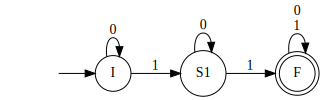

In [5]:
dotObj_dfa(dfaD2, FuseEdges=True)

In [6]:
dfaD3 = intersect_dfa(dfaD1, dfaD2)

In [7]:
len(dfaD3["Q"])

12

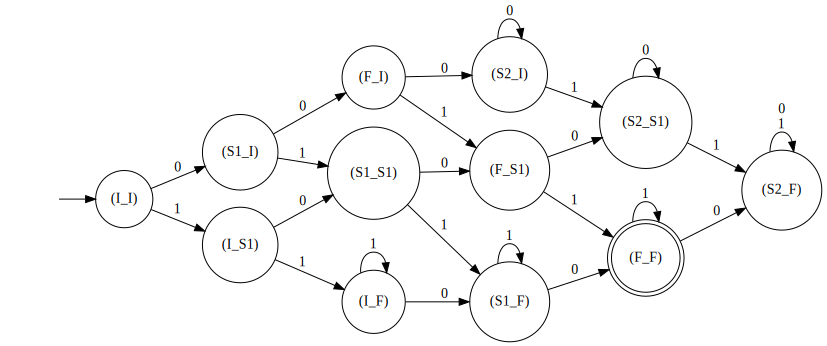

In [8]:
dotObj_dfa(dfaD3, FuseEdges=True)

In [9]:
nfahas0101 = md2mc('''
  NFA
  I : 0|1 -> I
  I : "" -> A
  A : 0 -> B
  B : 1 -> C
  C : 0 -> D
  D : 1 -> E
  E : 0|1 -> E
  E : "" -> F
  ''')

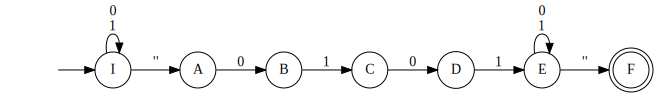

In [10]:
dotObj_nfa(nfahas0101, FuseEdges=True)

In [11]:
dfahas0101 = nfa2dfa(nfahas0101, STATENAME_MAXSIZE=50)

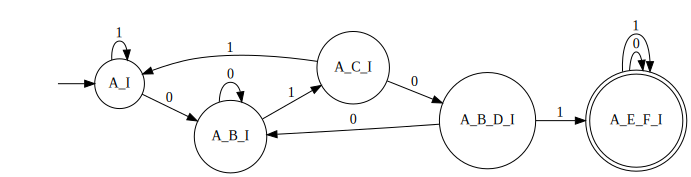

In [12]:
dotObj_dfa(min_dfa(dfahas0101), STATENAME_MAXSIZE=50)

In [13]:
nfa1 = md2mc('''
        NFA
            I : a -> F1
            I : b -> F2
            I : a -> S
''')

In [14]:
nfa2 = md2mc('''
        NFA
            I : b -> F1
            I : c -> F2
''')

In [15]:
nfa1Unfa2 = union_dfa(nfa2dfa(nfa1), nfa2dfa(nfa2))

Union on DFA with different alphabets.
Making alphabets the same (taking unions).


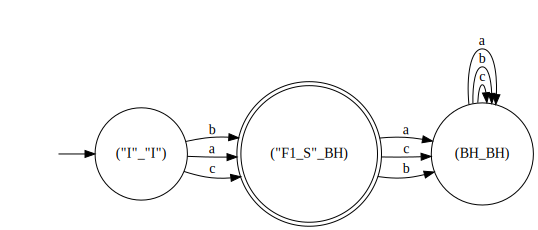

In [16]:
dotObj_dfa(min_dfa(nfa1Unfa2))

In [17]:
nfa1Infa2 = intersect_dfa(nfa2dfa(nfa1), nfa2dfa(nfa2))

Intersection on DFA with different alphabets.
Making alphabets the same (taking unions).


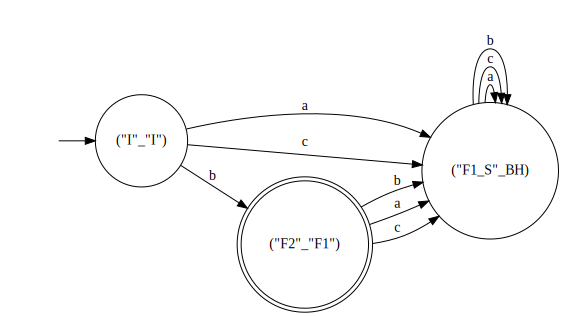

In [18]:
dotObj_dfa(min_dfa(nfa1Infa2))